In [2]:
import numpy as np
import soundfile as sf
import math
from scipy import signal
import scipy
import random
import sofa
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sofa

In [37]:
A=np.zeros((4096+511,4096))
A[:,1:6]
#test[:,[0,2]]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
def inverseIR(left_mea,right_mea,pathC,receiver,emitter=0):

    HRTF = sofa.Database.open(pathC)
 
    leftIR = HRTF.Data.IR.get_values(indices={'M':left_mea,'R':receiver,'E':emitter})

    leftIR=leftIR.reshape(leftIR.size,1)

    rightIR= HRTF.Data.IR.get_values(indices={'M':right_mea,'R':receiver,'E':emitter})

    rightIR=rightIR.reshape(rightIR.size,1)
    
    assert not np.all(leftIR == rightIR)
    
    #fourier transoform .
    
    leftFT = scipy.fft.fft(leftIR,axis=-1) 
    leftFT=leftFT.reshape(leftFT.size,1)
    rightFT = scipy.fft.fft(rightIR,axis=-1) 
    rightFT=rightFT.reshape(leftFT.size,1)
    
    #reverseL=1/leftFT
    reverseL=np.linalg.pinv(leftIR)
    reverseL=reverseL
    #reverseR=1/rightFT
    reverseR=np.linalg.pinv(rightIR)
    print(reverseR.shape)
    #inverse transform to get the time domain transfer function
    
    left = np.real(scipy.fft.ifft(reverseL,axis=-1))
    right=right.reshape(right.size,1)
    right = np.real(scipy.fft.ifft(reverseR,axis=-1)) 
    
    return (left,right)

In [16]:
pathC = '/Users/eeeds/Desktop/yg/mit_kemar_normal_pinna.sofa'
pathA='E://yonggang/corrected/random/audio0035random0002.wav'
HRTF = sofa.Database.open(pathC)

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_values(indices={"M":278})

plt.figure(figsize=(15, 5))

for receiver in np.arange(HRTF.Dimensions.R):
    left,right=inverseIR(left_mea=314,right_mea=278,pathC=pathC,receiver=1)
    
    d, sr1 = sf.read(pathA)
    
    d_channel1,d_channel2 = np.split(d, 2,axis=1)
    
    right= right.reshape(right.size,1)
    
    convolution2 = scipy.signal.convolve(d_channel2,right,mode='same')
    
    sf.write('/Users/eeeds/Desktop/convovle with right.wav',convolution2,44100)
    
    plt.plot(t,right,label=f'Receiver{receiver}')
    #legend.append('Receiver {0}'.format(receiver))
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()
plt.legend()
plt.title('right inverse IR')
#plt.savefig('/Users/eeeds/Desktop/inverserightIR.png',quality=100,dpi=1080)

(1, 512)


UnboundLocalError: local variable 'left' referenced before assignment

<Figure size 1080x360 with 0 Axes>

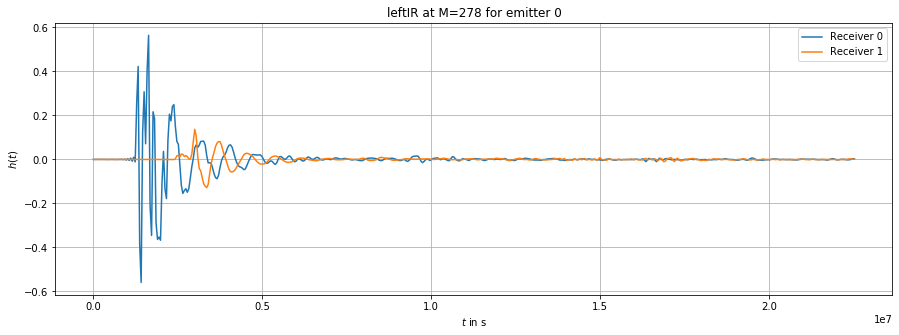

In [8]:
pathC = '/Users/eeeds/Desktop/yg/mit_kemar_normal_pinna.sofa'
HRTF = sofa.Database.open(pathC)
measurement=278

emitter=0
legend=[]

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_values(indices={"M":measurement})

plt.figure(figsize=(15, 5))
for receiver in np.arange(HRTF.Dimensions.R):
    plt.plot(t, HRTF.Data.IR.get_values(indices={"M":measurement, "R":receiver, "E":emitter}))
    legend.append('Receiver {0}'.format(receiver))
plt.title('leftIR at M={0} for emitter {1}'.format(measurement, emitter))
plt.legend(legend)
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()
#plt.savefig('/Users/eeeds/Desktop/leftIR.png',quality=100,dpi=1080)

Text(0.5, 1.0, 'left inverse IR')

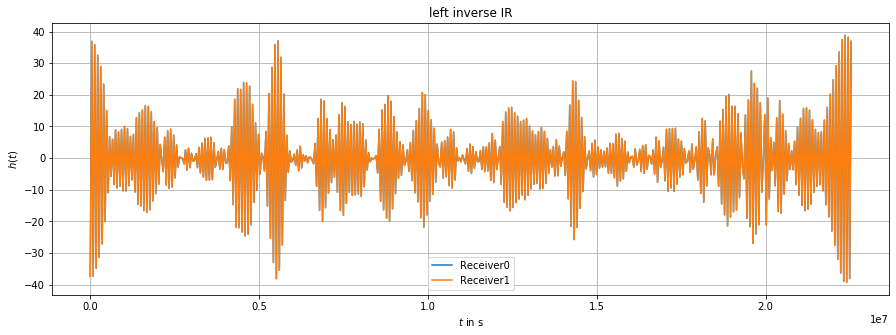

In [38]:
pathC = '/Users/eeeds/Desktop/yg/mit_kemar_normal_pinna.sofa'
HRTF = sofa.Database.open(pathC)

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_values(indices={"M":314})

plt.figure(figsize=(15, 5))


for receiver in np.arange(HRTF.Dimensions.R):
    left,right=inverseIR(left_mea=314,right_mea=278,pathC=pathC,receiver=0)
    plt.plot(t,left,label=f'Receiver{receiver}')
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()
plt.legend()
plt.title('left inverse IR')
#plt.savefig('/Users/eeeds/Desktop/inverseleftIR.png',quality=100,dpi=1080)